<a href="https://colab.research.google.com/github/thepianist9/AutoEncoder-Cifar10/blob/master/mnist_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist as fm
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.layers import Activation
from keras.utils import np_utils


Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train/255
X_test = X_test/255
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

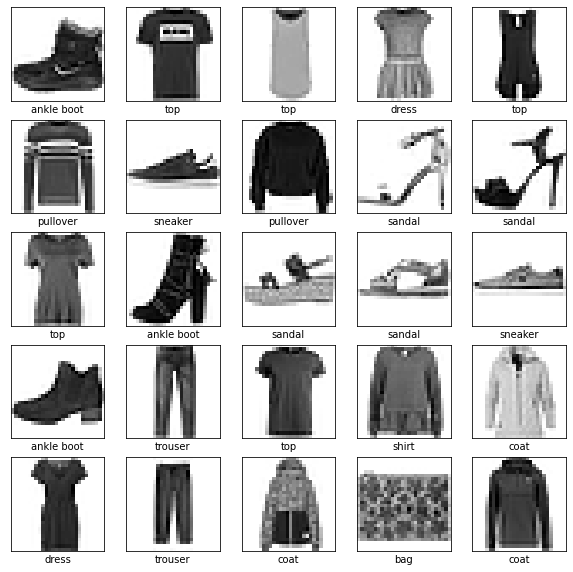

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labelNames[y_train[i]])
plt.show()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [ ]:
model.fit(X_train, y_train, batch_size=(1000), epochs=30, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 186us/step - loss: 0.5358 - accuracy: 0.8152 - val_loss: 1.7356 - val_accuracy: 0.7586
Epoch 2/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.3102 - accuracy: 0.8870 - val_loss: 1.5143 - val_accuracy: 0.8161
Epoch 3/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2747 - accuracy: 0.8986 - val_loss: 1.2502 - val_accuracy: 0.8511
Epoch 4/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2511 - accuracy: 0.9063 - val_loss: 1.0002 - val_accuracy: 0.8622
Epoch 5/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2303 - accuracy: 0.9138 - val_loss: 0.7588 - val_accuracy: 0.8439
Epoch 6/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2145 - accuracy: 0.9193 - val_loss: 0.5687 - val_accuracy: 0.8855
Epoch 7/30
60000/60000 [==============================] - 5s 78us/

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=(1000), epochs=30, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.0778 - accuracy: 0.9710 - val_loss: 0.3077 - val_accuracy: 0.9188
Epoch 2/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0715 - accuracy: 0.9733 - val_loss: 0.2897 - val_accuracy: 0.9220
Epoch 3/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0701 - accuracy: 0.9740 - val_loss: 0.2857 - val_accuracy: 0.9210
Epoch 4/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0693 - accuracy: 0.9730 - val_loss: 0.2938 - val_accuracy: 0.9199
Epoch 5/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0667 - accuracy: 0.9745 - val_loss: 0.2953 - val_accuracy: 0.9208
Epoch 6/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0621 - accuracy: 0.9766 - val_loss: 0.3248 - val_accuracy: 0.9167
Epoch 7/30
60000/60000 [==============================] - 5s 80us/st

In [ ]:
model_json = model.to_json()

with open('model_json', 'w') as json_file:
  json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk..")

Saved model to disk..


In [ ]:
from keras.models import model_from_json

json_file = open('model_json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('model.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
y_pred = loaded_model.predict(X_test)

In [ ]:
y_pred[0]

array([5.0195215e-15, 1.8741353e-22, 8.0707331e-17, 2.7319318e-22,
       6.6098819e-21, 6.1808014e-10, 1.4060332e-19, 1.4229598e-08,
       5.3858925e-14, 1.0000000e+00], dtype=float32)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

matrix = precision_recall_fscore_support(y_test.argmax(axis=1), y_pred.argmax(axis=1))
pd.DataFrame(matrix, index=["Precision", "Recall", "F1-Score", "Support"])

,0,1,2,3,4,5,6,7,8,9
Precision,0.869013,0.997963,0.888211,0.920714,0.856459,0.982054,0.805468,0.967131,0.983984,0.971
Recall,0.889000,0.980000,0.874000,0.929000,0.895000,0.985000,0.766000,0.971000,0.983000,0.971
F1-Score,0.878893,0.988900,0.881048,0.924838,0.875306,0.983525,0.785238,0.969062,0.983492,0.971
Support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


In [ ]:
confusion_matrix1

array([[889,   0,  16,  13,   3,   1,  70,   0,   8,   0],
       [  1, 980,   2,  10,   4,   0,   2,   1,   0,   0],
       [ 15,   0, 874,   9,  61,   0,  41,   0,   0,   0],
       [ 11,   1,   9, 929,  23,   0,  24,   0,   3,   0],
       [  1,   0,  39,  21, 895,   1,  43,   0,   0,   0],
       [  0,   0,   0,   0,   0, 985,   0,   8,   0,   7],
       [102,   1,  43,  25,  58,   0, 766,   0,   5,   0],
       [  0,   0,   0,   0,   0,   7,   0, 971,   0,  22],
       [  4,   0,   1,   2,   1,   2,   4,   3, 983,   0],
       [  0,   0,   0,   0,   0,   7,   1,  21,   0, 971]])

In [ ]:
misclassified = 0
for i in range(10):
  for j in range(10):
    if i==j:
      continue
    else:
      misclassified += confusion_matrix1[i,j]
print(misclassified)

757


In [ ]:
from sklearn.metrics import  accuracy_score

In [ ]:
def model_accuracy(epoch, batch_siz, opt):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  
  model.fit(X_train, y_train, batch_size=batch_siz, epochs=epoch, verbose=4, validation_data=(X_test, y_test))
  
  y_pred = loaded_model.predict(X_test)
  return accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))


In [ ]:
from sklearn.metrics import  accuracy_score
epoch = [10,30,50]
batch_siz = [500,1000, 5000]
optim = ['adam', 'rmsprop', 'SGD']
dict1={}
for i in epoch:
  for j in batch_siz:
    for k in optim:
      dict1[str(i)+str(j)+k] = model_accuracy(i, j, k) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 60000 samples, validate o

In [ ]:
dict1

{'101000SGD': 0.9243,
 '101000adam': 0.9243,
 '101000rmsprop': 0.9243,
 '105000SGD': 0.9243,
 '105000adam': 0.9243,
 '105000rmsprop': 0.9243,
 '10500SGD': 0.9243,
 '10500adam': 0.9243,
 '10500rmsprop': 0.9243,
 '301000SGD': 0.9243,
 '301000adam': 0.9243,
 '301000rmsprop': 0.9243,
 '305000SGD': 0.9243,
 '305000adam': 0.9243,
 '305000rmsprop': 0.9243,
 '30500SGD': 0.9243,
 '30500adam': 0.9243,
 '30500rmsprop': 0.9243,
 '501000SGD': 0.9243,
 '501000adam': 0.9243,
 '501000rmsprop': 0.9243,
 '505000SGD': 0.9243,
 '505000adam': 0.9243,
 '505000rmsprop': 0.9243,
 '50500SGD': 0.9243,
 '50500adam': 0.9243,
 '50500rmsprop': 0.9243}